خواندن فایل های  کتابخانه ای 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

تعریف دیکشنری بر روی داده ها و تعیین نوعشان

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}


train , test آدرس دهی داده های  

In [3]:
trainData = pd.read_csv("kc_house_train_data.csv", dtype=dtype_dict)
testData = pd.read_csv("kc_house_test_data.csv", dtype=dtype_dict)

  با تعیین نوع داده هایمان train فراخوانی داده

In [4]:
trainData.dtypes

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int32
floors            object
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

  با تعیین نوع داده هایمان test فراخوانی داده

In [5]:
testData.dtypes

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int32
floors            object
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

  پرداخته شده regression در این قسمت به نمایش نمودارهای

In [6]:
#نمایش دادن مدل ریگرشن روی داده های ورودی مثل  عرض از مبدا و شیب خط 
def plot_regression_line(inputFeatures, outputs, intercept,slope,inputFeaturesLabel,outputsLabel):
    
    #نمایش و تعیین رنگ قرمز  و سایز ورودی داده ها و خروجی پرداخته شده
    plt.scatter(inputFeatures, outputs, color = "R",marker = "o", s = 5)
    
    #ساخت یک متغیر به اسم پیش بینی : حال تابع ریگرشن به همراه داده های ورودی و عرض از مبدا و شیب خط را درونش قرار داده ایم
    predictions = get_regression_predictions(inputFeatures, intercept, slope)
    
    # نمایش داده های ورودی و پیش بینی با رنگ سبز
    plt.plot(inputFeatures, predictions, color = "g")
    
    # زدن بر چسب به ورودی و خروجی ها 
    plt.xlabel(inputFeaturesLabel)
    plt.ylabel(outputsLabel)
    
    # در نهایت با توجه به کد هایی که نوشته ایم همه را می توانیم از این دستور نمایش دهیم
    plt.show()

  پرداخته شده simple-linear- regression  در این قسمت به فراخوانی توابع

(1) I write a generic function that accepts a column of data ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’ with closed form solution. 
What we need 
The number of data points 
The mean of the sum of the input 
The mean of the sum of the output 
The mean of the sum of the multiply of the input and the output 
The mean of the sum of the input squared

In [7]:
#  روی داده های ورودی و خروجیsimple-linear- regression تعریف تابع 
def simple_linear_regression(inputFeatures, outputs):
    
    # در این قسمت روی داده ها ی ورودی یک شمارنده میگذاریم
    dataCount = inputFeatures.count()
    
    # از ورودیمان میخواهیم یک میانگین بگیریم و در یک متغیر آنرا بریزیم
    inputMean = inputFeatures.sum() / dataCount
    
    # از خروجیمان میخواهیم یک میانگین بگیریم و در یک متغیر آنرا بریزیم
    outputMean = outputs.sum() / dataCount
    
    # میانگین گیری به شرط ضرب ورودی و خروجی داده ها و تقسیم بر شمارنده هایی هر بار  میدهد و در نهایت در یک متغیر میریزیم 
    inputOutputMean = (inputFeatures * outputs).sum() / dataCount
    
    #   میانگین مربعات را روی داده های ورودی میگیریم و درون یک متغیر قرار میدهیم طبق اپروچ 1
    inputSquaredMean = (inputFeatures ** 2).sum() / dataCount
    
    #حال در صورت کسرمان میانگین ورودی و خروجی که از قبل گرفته ایم را  از ضرب میانگین ورودی و خروجی کم میکنیم 
    numerator = (inputOutputMean) - (inputMean)*(outputMean)
    
   #حال در مخرج کسرمان متغیر قبلی را از ضرب میانگین ورودی و خروجی کم میکنیم 
    denominator = (inputSquaredMean) - (inputMean)*(inputMean)
    
    # برای بدست آوردن شیب خط باید صورت کسر را در مخرج کسر تقسیم کنیم
    slope = numerator/denominator
    
    #برای بدست آوردن عرض از مبدا باید میانگین گیری خروجیمان را از شیب خط در میانگین گیری ورودیمان کم کنیم 
    intercept = (outputMean) - slope * (inputMean)
    
    #در نهایت عرض از مبدا و شیب خط را برمیگرداند و نشان میدهد
    return(intercept, slope)

در این قسمت به تخمین شیب خط و عرض از مبدا روی داده های ترین برای پیش بینی قیمت خانه با دادن متراژ خانه میپردازیم

 (2)Use your function to calculate the estimated slope and intercept on the training data to predict ‘price’ given ‘sqft_living’.



In [8]:
#تعیین و مشخص کردن متراژ خانه از داده ترین و درون یک متغیر میریزیم 
sqftLivingInputFeatures = trainData['sqft_living']
#حال قیمت را از داده ترین درون یک متغیر میریزیم
priceOutputs = trainData['price']
# حال تابع ریگرشن خطی را روی متراژ و قیمت تعریف میکنیم و درون یک متغیر میریزیم 
sqftLivingIntercept, sqftLivingSlope = simple_linear_regression(sqftLivingInputFeatures, priceOutputs)

حال نتایج عرض از مبدا و شیب خط را نمایش میدهیم که در نهایت مقدار جفتشان با این کد نویسی نمایش داده میشود

In [9]:
print(sqftLivingIntercept,sqftLivingSlope)

-47116.07907289488 281.95883963034294


تعریف تابعی برای پیش بینی خروجی


(3)Write a function that accepts a column of data ‘input_feature’, the ‘slope’, and the ‘intercept’ and returns an a column of predictions ‘predicted_output’ for each entry in the input column

In [10]:
# Y = W0 + (W1 * X)
#   تعریف تابع ریگرشن برای پیش بینی روی داده های ورودی و عرض از مبدا و شیب خط 
def get_regression_predictions(inputFeatureCell, intercept, slope):
    
    #   به پیش بینی خروجیمان پرداخته شده با در نظر گرفتن داده های ورودی و عرض از مبدا و شیب خط
    predictedOutput = intercept + (slope * inputFeatureCell)
    
    #در نهایت پیش بینی خروجی را بر میگرداند
    return(predictedOutput)

با استفاده از شیب خط و عرض از مبدا میپردازیم به پیش بینی قیمت خانه با توجه به متراژ = 2650

(4) Quiz Question: Using your Slope and Intercept from (2), What is the predicted price for a house with 2650 sqft?



In [11]:
# با دادن تابع ریگرشن روی متراژ و عرض از مبدا و شیب خط حال قیمت را پیش بینی میکنیم
get_regression_predictions(2650, sqftLivingIntercept, sqftLivingSlope)

700074.8459475139

در این قسمت به محاسبه میانگین مربعات میپردازیم

(5) Write a function that accepts column of data: ‘input_feature’, and ‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the Residual Sum of Squares (RSS).

In [12]:
#RSS (Y - [W0 + (W1 * X)]) ** 2
#تعریف تابع میانگین مربعات به روی داده های ورودی و خروجی و عرض از مبدا و شیب خط
def get_residual_sum_of_squares(inputFeatures, outputs, intercept,slope):
    
    # تعریف شمارنده به روی داده های ورودی
    dataCount = inputFeatures.count()
    RSS = 0
    #  تعریف یک حلقه برای داده های ورودی با توجه به شمارنده ورودی ها 
    for index,inputFeature in enumerate(inputFeatures):
        # طبق فرمول RSS تعریف 
        RSS = RSS + ((outputs[index] - get_regression_predictions(inputFeature, intercept, slope)) ** 2)
        #را برمیگرداند RSS در نهایت 
    return(RSS)

 پرداخته ام RSS در این قسمت به محاسبه 

(6) Quiz Question: According to this function and the slope and intercept from (2) What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?



In [13]:
#به روی متراژ داده ها و قیمت خانه و متراژ عرض از مبدا و متراژ شیب خط حال پیش بینی این تابع را بدست می آوریمget_residual_sum_of_squares با تعریف ای تابع 
get_residual_sum_of_squares(sqftLivingInputFeatures, priceOutputs, sqftLivingIntercept,sqftLivingSlope)

1201918354177285.2

در این قسمت به معکوس کردن تابع ریگرشن روی داده ها میپردازیم

(7)Note that although we estimated the regression slope and intercept in order to predict the output from the input, since this is a simple linear relationship with only two variables we can invert the linear function to estimate the input given the output! 
Write a function that accept a column of data:‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the column of data: ‘estimated_input’.

In [14]:
# X = (Y - W0) / W1 =
# تعریف تابع معکوس به روی خروجی  و عرض از مبدا و شیب خط طبق فرمول بالا
def inverse_regression_predictions(outputCell, intercept, slope):
    estimatedInput = (outputCell - intercept) / slope
    return(estimatedInput)

در این قسمت به پیش بینی متراژ با توجه به این قیمت $800,000 

(8) Quiz Question: According to this function and the regression slope and intercept from (1) what is the estimated square-feet for a house costing $800,000?

In [15]:
#در اینجا قیمت را داریم پس باید متراژ را محاسبه کنیم
inverse_regression_predictions(800000, sqftLivingIntercept, sqftLivingSlope)

3004.3962451522752

در این قسمت با توجه به متراژ خانه میپردازیم به تخمین قیمت اتاق خوابها  با استفاده از تابع ریگرشن خطی 

(9)Instead of using ‘sqft_living’ to estimate prices we could use ‘bedrooms’ (a count of the number of bedrooms in the house) to estimate prices. Using your function from (1) calculate the Simple Linear Regression slope and intercept for estimating price based on bedrooms. Save this slope and intercept for later (you might want to call them e.g. bedroom_slope, bedroom_intercept).

In [16]:

bedroomsInputFeatures = trainData['bedrooms']
priceOutputs = trainData['price']
bedroomsIntercept, bedroomsSlope = simple_linear_regression(bedroomsInputFeatures, priceOutputs)

In [17]:
print(bedroomsIntercept,bedroomsSlope)

109473.17762295791 127588.95293398833


در این قسمت  2 مدل  مختلف برای محاسیه میانگین مربعات به روی داده های تست داریم

(10)Now that we have 2 different models compute the RSS from BOTH models on TEST data.

In [18]:
#داده 1 متراژ خانه
sqftLivingTestInputFeatures = testData['sqft_living']
# داده 2 اتاق خواب
bedroomsTestInputFeatures = testData['bedrooms']
#داده 3 قیمت 
priceTestOutputs = testData['price']

# محاسبه میانگین مربعات به روی داده های تعریف کرده ایم
sqftLivingTest_RSS = get_residual_sum_of_squares(sqftLivingTestInputFeatures, priceTestOutputs, sqftLivingIntercept,sqftLivingSlope)
bedroomsTest_RSS = get_residual_sum_of_squares(bedroomsTestInputFeatures, priceTestOutputs, bedroomsIntercept,bedroomsSlope)

In [19]:
print(sqftLivingTest_RSS)
print(bedroomsTest_RSS)

275402933617813.03
493364585960301.6


میپردازیم به کمترین خطا با توجه به میانگین مربعات به روی 2 مدل متراژ خانه و اتاق خواب روی داده تست و آنها را روی نمودار نمایش میدهیم

(11)Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.

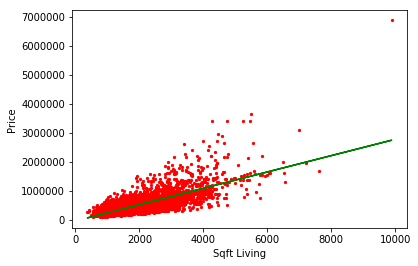

In [20]:
plot_regression_line(sqftLivingTestInputFeatures, priceTestOutputs, sqftLivingIntercept,sqftLivingSlope,'Sqft Living','Price')

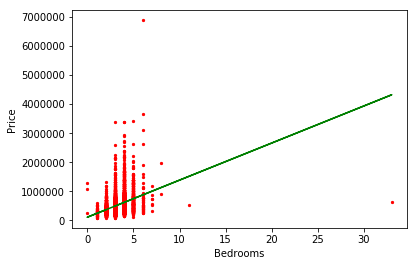

In [21]:
plot_regression_line(bedroomsTestInputFeatures, priceTestOutputs, bedroomsIntercept,bedroomsSlope,'Bedrooms','Price')

